# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

# **Redes Neuronales: Multi-class Classification**

En este cuaderno, se cubriran los siguientes temas:

### 1. Clasificación Multi-clase

*   Clasificación **one vs all**
*   Función de activación softmax

### 2. Definir una mejor arquitectura

### 3. Guardar modelo para despliegue

# 1. Clasificación Multi-clase

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [ ]:
# load the data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True);

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## El conjunto de datos MNIST
Es uno de los conjuntos de datos más populares en el campo del aprendizaje automático y la visión por computadora. Este conjunto de datos consta de imágenes de dígitos escritos a mano, del 0 al 9, recopiladas de varios documentos del censo estadounidense. Cada imagen tiene un tamaño de 28x28 píxeles y está en escala de grises, lo que significa que cada píxel tiene un valor entre 0 (blanco) y 255 (negro). El conjunto de datos MNIST se utiliza comúnmente como un punto de referencia para probar algoritmos de clasificación de imágenes y desarrollar modelos de reconocimiento de dígitos escritos a mano. Contiene un total de 70,000 imágenes, divididas en un conjunto de entrenamiento de 60,000 imágenes y un conjunto de prueba de 10,000 imágenes. El objetivo es clasificar correctamente cada imagen en una de las 10 clases correspondientes a los dígitos del 0 al 9.

In [ ]:
# train/test split que propone el dataset
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

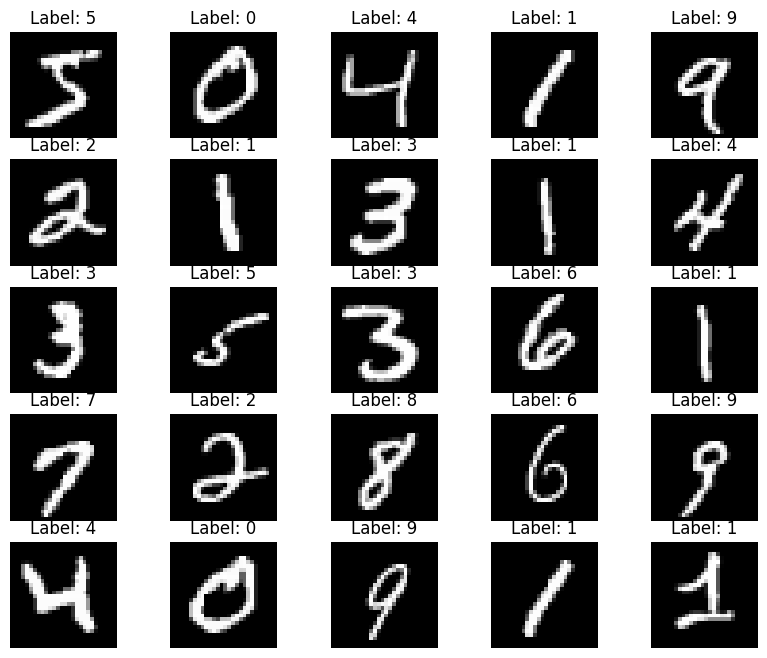

In [ ]:
# Visualizar algunas de las imágenes
plt.figure(figsize=(10, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Clasificación Multi-clase

El clasificador MLP se puede utilizar para realizar clasificación multi-clase, es decir, clasificar instancias en más de dos clases diferentes.

Para realizar la clasificación multi-clase, `MLPClassifier` utiliza una estrategia de **"one-vs-all"** (también conocida como "one-vs-rest"). En esta estrategia, se entrena un clasificador binario para cada clase en el conjunto de datos, donde el objetivo es distinguir entre las instancias de esa clase y todas las demás clases. Por ejemplo, si tienes un problema de clasificación con 3 clases (A, B y C), `MLPClassifier` entrenará tres clasificadores separados: uno para clasificar instancias como clase A vs. no A, otro para clasificar instancias como clase B vs. no B, y otro para clasificar instancias como clase C vs. no C.

El `MLPClassifier` convierte internamente las clases a un formato **codificado one-hot** durante el proceso de entrenamiento. Por lo tanto, para un problema de clasificación multiclase, crea una red neuronal con una capa de salida que consiste en tantos nodos como clases haya, en este caso, 10 nodos para las clases del dígito 0 al 9. Cada nodo de salida corresponde a la presencia de una clase específica. Sin embargo, es importante tener en cuenta que el `MLPClassifier` utiliza estos nodos en conjunto con una **función de activación softmax** para generar una distribución de probabilidad para las etiquetas multiclase, en lugar de entrenar clasificadores binarios separados para cada clase.

Durante la predicción, `MLPClassifier` utiliza la salida de todos los clasificadores binarios para determinar la clase final de cada instancia. La clase asignada será aquella para la cual el clasificador binario correspondiente predice la probabilidad más alta.

![](https://github.com/AntonioEscamilla/images-in-readMe/blob/master/Curso%20IA/mnist.gif?raw=true)

### Activación softmax

En el caso de la clasificación multi-clase, la función MLPClassifier de Scikit-learn utiliza la función de activación softmax en la capa de salida para generar las probabilidades de pertenencia a cada una de las clases. La función softmax toma como entrada un vector de puntajes y produce una distribución de probabilidad sobre las diferentes clases.

Cuando se entrena el MLPClassifier, la capa de salida tiene un número de neuronas igual al número de clases en el problema. Después de pasar las entradas a través de las capas ocultas, la capa de salida utiliza la función softmax para calcular las probabilidades de pertenencia a cada clase.


![](https://github.com/AntonioEscamilla/images-in-readMe/blob/master/Curso%20IA/softmax.jpg?raw=true)

In [ ]:
# Crear el modelo MLP: sgd, 30 neuronas en capa oculta, lr=0.1 y constante
# SU CÓDIGO AQUI

In [ ]:
# Ajustar a los datos de entrenamiento
# SU CÓDIGO AQUI

In [ ]:
# Graficar 'loss curve'
# SU CÓDIGO AQUI

In [ ]:
# Calcular la exactitud
# SU CÓDIGO AQUI

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

 # Calcular matriz de confusión y graficarla con sns.heatmap
 # SU CÓDIGO AQUI

plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

In [ ]:
# Representación de Pesos en la Red
# SU CÓDIGO AQUI

#2. Definir una mejor arquitectura

El desafío consiste en crear una arquitectura de red neuronal para el problema de clasificación de dígitos MNIST que sea más eficiente y precisa que un MLP con 30 neuronas en una sola capa oculta. La tarea es aumentar el número de neuronas, pero distribuirlas en más capas ocultas de manera efectiva para mejorar el rendimiento del modelo.

Utiliza las mismas métricas que antes para comparar el desempeño de esta nueva arquitectura.

In [ ]:
# Crear el modelo MLP: sdg, usar neuronas en almenos 2 capas ocultas, lr adaptativo
# SU CÓDIGO AQUI

In [ ]:
# Ajustar a los datos de entrenamiento
# SU CÓDIGO AQUI

In [ ]:
# Graficar 'loss curve'
# SU CÓDIGO AQUI

In [ ]:
# Calcular la exactitud
# SU CÓDIGO AQUI

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

 # Calcular matriz de confusión y graficarla con sns.heatmap
 # SU CÓDIGO AQUI

plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# 3. Guardar modelo para despliegue

In [ ]:
import pickle

# Nombre del archivo donde se guardará el modelo de red neuronal.
filename = 'MLP_for_MNIST.pkl'

# Estructura de datos que contendrá el modelo de la red neuronal.
data_struct = {
    "nn_model": nn_model
}

# Abrir el archivo en modo de escritura binaria y guardar la estructura de datos utilizando pickle.
with open(filename, 'wb') as f:
    pickle.dump(data_struct, f)

## Usamos el modelo guardado para nuevas predicciones

In [ ]:
#Cargamos el modelo
import pickle

# Abrir el archivo que contiene el modelo de red neuronal en modo de lectura binaria.
with open('MLP_for_MNIST.pkl', 'rb') as f:
    # Cargar la estructura de datos del archivo utilizando pickle.
    data_struct = pickle.load(f)
# Cerrar el archivo después de cargar los datos.
f.close()

In [ ]:
modelo_MLP = data_struct["nn_model"]

In [ ]:
y_pred = modelo_MLP.predict(X_test)

print(f"Accuracy para modelo MLP: {accuracy_score(y_test, y_pred)}")

Accuracy para modelo MLP: 0.965


In [ ]:
import numpy as np
import math

# Visualizar algunas de las predicciones
plt.figure(figsize=(10, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    prediccion = modelo_MLP.predict(X_test[i].reshape(1, -1))               # reshape(1, -1) ajusta los datos de una sola observación para la predicción
    prob = modelo_MLP.predict_proba(X_test[i].reshape(1, -1))               # predict_proba es una versión de predict que devuelve las probabilidades de cada clase
    prob = math.trunc(np.max(prob) * 10000) / 10000                         # truncar a dos cifras (sin redondear) la maxima probabilidad
    plt.title(f'Label: {prediccion[0]}, ({prob})')
    plt.axis('off')
plt.show()